# Import Libraries

In [1]:
import nltk
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
import re  # For preprocessing

from collections import defaultdict  # For word frequency

#import spacy  # For preprocessing

In [3]:
#import path of excel sheet of virus data 30k rows
path = 'C:/Users/591182/Documents/Wids-I Data/virus-data-clean.xlsx'

## Load in "Virus" Excel Sheet that was cleaned academic articles

In [4]:
#read in excel to a df
df = pd.read_excel(open(path,'rb'))
df.head()

,paper_id,abstract,text,bibliography
0,0b2b9baffc3066455d3b2c2a982506647f6e26e0,Abstract\n\nThe scientific papers dealing with...,Introduction\n\nThe rapid worldwide spread of ...,"COVID-19 publications: Database coverage, cita..."
1,0b2d488ca3f4f788888a7f91f921674b0a650339,Abstract\n\nSevere acute respiratory syndrome ...,Main\n\nSARS-CoV-2 is mainly transmitted throu...,The airway epithelium: Soldier in the fight ag...
2,0b2d48d860b8473121923c755d3f0f3a8be9d5b7,Abstract\n\nAutophagy is a conserved eukaryoti...,Introduction\n\nMacroautophagy (hereafter refe...,Hepatitis C virus genotype 1a growth and induc...
3,0b2dbadf20a5eb3e7114d06bc309f7a2dd7aa714,"Abstract\n\nIn a previous study, we have shown...",\n\nstructural proteins (7-9). The two polypro...,The PRRSV replicase: exploring the 493 multifu...
4,0b30e970d817fdc264c7e6f61eda62e29775e650,Abstract\n\nCoronaviruses (CoVs) produce a wid...,Introduction\n\nCoronaviruses (CoVs) form a la...,Detection of coronavirus antigen in fecal samp...


### Apply Sentence Tokenizer to split the "text" into sentences

In [5]:
#apply funnctin to create another column called "tokenized sentences" that is a col with sentence breaks
df['tokenized_sents'] = df.apply(lambda row: nltk.sent_tokenize(row['text']), axis=1)

In [6]:
df['tokenized_sents'][7]

['Prevalence and Persistence of Pathogens in Mice\n\nK nowledge of the prevalence, replication, and persistence of pathogens in a mouse facility aids both in assessments of the risk of transmission to other mice and mouse facilities and in the development of suitable management strategies to eliminate such risks.But there is a lack of current, comprehensive information on the prevalence of bacteria and parasites in mice in Europe (for detailed information on US prevalence of these and murine viruses see Carty 2008) .',
 'With respect to murine viruses, a summary of data from the past decade shows that the most prevalent in the United States (Carty 2008; Livingston and Riley 2003) and Europe (Schoondermark-van de Ven et al.',
 "2006 ) are mouse hepatitis virus (MHV 1 ), parvoviruses, mouse rotavirus, Theiler's murine encephalomyelitis virus (TMEV 1 ), reovirus type 3 (reo 3), Sendai virus, and mouse adenovirus (MAdV) (FL + K87).",
 'The report on European prevalence (Schoondermark-van d

In [7]:
df.head()

,paper_id,abstract,text,bibliography,tokenized_sents
0,0b2b9baffc3066455d3b2c2a982506647f6e26e0,Abstract\n\nThe scientific papers dealing with...,Introduction\n\nThe rapid worldwide spread of ...,"COVID-19 publications: Database coverage, cita...",[Introduction\n\nThe rapid worldwide spread of...
1,0b2d488ca3f4f788888a7f91f921674b0a650339,Abstract\n\nSevere acute respiratory syndrome ...,Main\n\nSARS-CoV-2 is mainly transmitted throu...,The airway epithelium: Soldier in the fight ag...,[Main\n\nSARS-CoV-2 is mainly transmitted thro...
2,0b2d48d860b8473121923c755d3f0f3a8be9d5b7,Abstract\n\nAutophagy is a conserved eukaryoti...,Introduction\n\nMacroautophagy (hereafter refe...,Hepatitis C virus genotype 1a growth and induc...,[Introduction\n\nMacroautophagy (hereafter ref...
3,0b2dbadf20a5eb3e7114d06bc309f7a2dd7aa714,"Abstract\n\nIn a previous study, we have shown...",\n\nstructural proteins (7-9). The two polypro...,The PRRSV replicase: exploring the 493 multifu...,"[\n\nstructural proteins (7-9)., The two polyp..."
4,0b30e970d817fdc264c7e6f61eda62e29775e650,Abstract\n\nCoronaviruses (CoVs) produce a wid...,Introduction\n\nCoronaviruses (CoVs) form a la...,Detection of coronavirus antigen in fecal samp...,[Introduction\n\nCoronaviruses (CoVs) form a l...


### Count how many observations we have

In [8]:
df.paper_id.count()

25805

### Example of the Tokenized Sentence

In [9]:
df.tokenized_sents[7]

['Prevalence and Persistence of Pathogens in Mice\n\nK nowledge of the prevalence, replication, and persistence of pathogens in a mouse facility aids both in assessments of the risk of transmission to other mice and mouse facilities and in the development of suitable management strategies to eliminate such risks.But there is a lack of current, comprehensive information on the prevalence of bacteria and parasites in mice in Europe (for detailed information on US prevalence of these and murine viruses see Carty 2008) .',
 'With respect to murine viruses, a summary of data from the past decade shows that the most prevalent in the United States (Carty 2008; Livingston and Riley 2003) and Europe (Schoondermark-van de Ven et al.',
 "2006 ) are mouse hepatitis virus (MHV 1 ), parvoviruses, mouse rotavirus, Theiler's murine encephalomyelitis virus (TMEV 1 ), reovirus type 3 (reo 3), Sendai virus, and mouse adenovirus (MAdV) (FL + K87).",
 'The report on European prevalence (Schoondermark-van d

### Input a list of assertion words

In [10]:
# next step is create a list of assertion words

assertion_words_list = ["assert", "say", "proclaim", "profess", "attest", "predicat", "claim", "site", "alleg", "contend", "argue","mention", "defend", "declar", "insist", "challenge", "say", "express", "state", "think", "said", "know"]

### Create function to search the tokenized Sentence for if one of the assertion words is in it.

In [11]:
def find_assertion(token_sentence):
    for sentence in token_sentence:
        for word in assertion_words_list:
            if str(word) in sentence:
                #print(sentence)
                return sentence
    return 'other'

In [12]:
df["clean"] = df['tokenized_sents'].apply(lambda x: find_assertion(x))

In [13]:
df.clean[2]

'Currently, evidence suggests that viruses have evolved a diverse array of countermeasures to contend with this pathway; some inhibit autophagy and are negatively affected when this interference is abrogated, while others appear to subvert it to their own ends and respond positively when it is induced.'

### Create Dataframe of just the records with an assertion word

### 25,112 records that contain "assertion" word: dropped text and bibliography variable

In [14]:
#put the tokenized sentences that have claims in them to a json
#new line for each tokenized_sents
clean_df = df.loc[df['clean'] != 'other']

In [15]:
clean_df.drop(['text','bibliography','tokenized_sents'], axis=1, inplace=True)

C:\Users\591182\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [16]:
#clean_df.drop_duplicates()
result_df = clean_df.drop_duplicates(subset=['paper_id', 'clean'], keep='first')

In [17]:
result_df.head()

,paper_id,abstract,clean
0,0b2b9baffc3066455d3b2c2a982506647f6e26e0,Abstract\n\nThe scientific papers dealing with...,Introduction\n\nThe rapid worldwide spread of ...
1,0b2d488ca3f4f788888a7f91f921674b0a650339,Abstract\n\nSevere acute respiratory syndrome ...,"Currently, our knowledge about innate immune d..."
2,0b2d48d860b8473121923c755d3f0f3a8be9d5b7,Abstract\n\nAutophagy is a conserved eukaryoti...,"Currently, evidence suggests that viruses have..."
3,0b2dbadf20a5eb3e7114d06bc309f7a2dd7aa714,"Abstract\n\nIn a previous study, we have shown...",Nsp1 and nsp2 are involved in the cleavage at ...
4,0b30e970d817fdc264c7e6f61eda62e29775e650,Abstract\n\nCoronaviruses (CoVs) produce a wid...,The population of water buffalo in the world w...


In [19]:
result_df.paper_id.count()

21173

In [25]:
clean_df[0:2]

,paper_id,abstract,clean
0,0b2b9baffc3066455d3b2c2a982506647f6e26e0,Abstract\n\nThe scientific papers dealing with...,Introduction\n\nThe rapid worldwide spread of ...
1,0b2d488ca3f4f788888a7f91f921674b0a650339,Abstract\n\nSevere acute respiratory syndrome ...,"Currently, our knowledge about innate immune d..."


### Export the DF to a dictionary

In [21]:
list_of_claims = result_df.to_dict('records')

## Export the dictionary to JSON with 1 claim on each row: Use for elastic search

In [24]:
# Now we need to get the above into json for each dict--> 
my_data = list_of_claims
with open("C:/Users/591182/Documents/Wids-I Data/Assertion_json/claims_v3.json", "a") as f:
    for claim in my_data:
        f.write(json.dumps(claim))
        f.write("\n")

# Put the cleaned claims in word to vector format

In [22]:
#putting the "clean" claims in word to vector format
import multiprocessing

import gensim

In [23]:
#make the clean_df.clean into a list
claims_list = result_df['clean'].tolist()
claims_list
claims_list2 = [i.replace('\n',' ') for i in claims_list]
claims_list2

['Introduction  The rapid worldwide spread of the new epidemic COVID-19, caused by the virus SARS-CoV-2, with now more than 3.4 million confirmed cases of the disease and a confirmed death rate of almost 7% (World Health Organization, 2020) requires fast and comprehensive efforts of states and societies to combat the disease effectively by means of practical and appropriate medical, administrative and economic actions.',
 'Currently, our knowledge about innate immune defense mechanisms against SARS-CoV-2 in the respiratory tract is very limited.To identify endogenous antiviral peptides and proteins, we previously generated peptide/protein libraries from body fluids and tissues and screened the resulting fractions for antiviral factors 3 .',
 'Currently, evidence suggests that viruses have evolved a diverse array of countermeasures to contend with this pathway; some inhibit autophagy and are negatively affected when this interference is abrogated, while others appear to subvert it to th

model = gensim.models.Word2Vec(
        claims_list2,
        size=500,
        window=10,
        min_count=2,
        workers=10,
        iter=10)

model = Word2Vec(claims_list2, size=120, window=6, 
                               min_count=5, workers=7, iter=15)

documents = []
for document in claims_list2:
    word_vectors = []
    for word in document.split(' '): # or your logic for separating tokens
        word_vectors.append(model.wv[word])
    documents.append(np.concatenate(word_vectors))

# resulting in an n * 120 -- that is, `Word2Vec:size`-- array
document_matrix = np.concatenate(documents)

In [24]:
from nltk.tokenize import sent_tokenize, word_tokenize 
data = [] 
  
# iterate through each sentence in the file 
for t in claims_list2:
    for i in sent_tokenize(t): 
        temp = [] 
      
    # tokenize the sentence into words 
        for j in word_tokenize(i): 
            temp.append(j.lower()) 
  
        data.append(temp) 
  

In [25]:
model1 = gensim.models.Word2Vec(data, min_count = 1,  
                              size = 100, window = 5)

In [23]:
model1.wv.most_similar(positive='antibody')

[('neutralizing', 0.9213638305664062),
 ('antibodies', 0.9107158780097961),
 ('antigen', 0.9098551273345947),
 ('igg', 0.8840112686157227),
 ('monoclonal', 0.8835498094558716),
 ('neutralization', 0.8713597059249878),
 ('titers', 0.8632505536079407),
 ('igm', 0.8570138216018677),
 ('direct', 0.8484992980957031),
 ('inhibition', 0.8459371328353882)]

In [26]:
# for i in body text replace the word with the vector
flat_list = [item for sublist in data for item in sublist]

In [27]:
placeholder_list=[]

for sent in claims_list2[:5000]:
    sentence_list=[]
    z = sent.split(" ")
    str_list = list(filter(None, z))
    #print(str_list)
    for t in str_list:
        #print(t)
        lower_case_word = t.lower()
        #print(lower_case_word)
        if lower_case_word in flat_list:
            #print(lower_case_word)
            sentence_list.append(model1.wv[lower_case_word].tolist())
    placeholder_list.append(np.asarray(sentence_list))

In [121]:
# go through each claim, turn each claim to a vector, put that to np array, then flatten each of them

In [28]:
#convert list to numpy array
np_array = np.asarray(placeholder_list)

C:\Users\591182\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [29]:
np_array[:1]

array([array([[ 1.22478902, -0.15345909, -1.93395007, ...,  0.28363207,
         1.04529369,  0.0783515 ],
       [ 1.55940771, -1.39084733, -1.45778596, ...,  1.04975128,
         1.66206133, -0.39402992],
       [-0.28397241,  0.31754279, -1.17140722, ...,  0.07529061,
         1.37350023, -0.55353862],
       ...,
       [-0.01856159,  0.0275004 ,  0.01445205, ..., -0.06188843,
         0.02749714, -0.04913036],
       [ 0.49993169, -0.35182759, -0.781591  , ...,  0.17058346,
         0.61042297, -0.15892369],
       [-0.27673951,  0.23371622, -0.69816512, ..., -0.35163981,
         0.75594145, -0.66471058]])], dtype=object)

In [30]:
np_array.shape

(5000,)

In [31]:
np_array[:1]

array([array([[ 1.22478902, -0.15345909, -1.93395007, ...,  0.28363207,
         1.04529369,  0.0783515 ],
       [ 1.55940771, -1.39084733, -1.45778596, ...,  1.04975128,
         1.66206133, -0.39402992],
       [-0.28397241,  0.31754279, -1.17140722, ...,  0.07529061,
         1.37350023, -0.55353862],
       ...,
       [-0.01856159,  0.0275004 ,  0.01445205, ..., -0.06188843,
         0.02749714, -0.04913036],
       [ 0.49993169, -0.35182759, -0.781591  , ...,  0.17058346,
         0.61042297, -0.15892369],
       [-0.27673951,  0.23371622, -0.69816512, ..., -0.35163981,
         0.75594145, -0.66471058]])], dtype=object)

In [32]:
fit_for_cluster = [row.max(axis=0) for row in placeholder_list]

In [33]:
fit_for_cluster[:2]

[array([ 1.95472217,  1.79113424,  0.01445205,  1.56597972,  0.98245317,
         2.22977614,  1.43011379,  2.33497596,  2.11105418, -0.04542228,
         1.213678  ,  0.18536279,  2.37512803,  2.74877572,  1.78400362,
         2.19930029,  0.36867869,  3.34472036,  0.65893304,  3.8403666 ,
         2.93008804,  0.54873085,  2.32192516,  0.99277836,  1.27474201,
         1.08638024,  1.7285248 ,  2.58992076,  2.09048986,  0.63230449,
         2.3673315 ,  2.0968771 ,  1.84365249,  0.82812792,  1.57440114,
         1.59579003,  1.49304605,  2.52794766,  3.14224172,  4.53240728,
         2.46289277,  1.73615301,  1.69417846,  2.29871106,  0.17600058,
         2.83528686,  0.10133603,  1.46783924,  0.71339309,  0.55290198,
         0.46349907,  0.72151721,  1.24397087,  0.87676752,  1.76289463,
         1.56314075,  2.51111984,  2.26222777,  0.88496119,  1.48128974,
         2.14839363,  1.74163663,  3.59755754,  0.31282467,  1.17088604,
         1.04942501,  2.46105027,  1.91616213,  0.6

In [106]:
np_array.flatten()

array([array([[ 1.69435287, -0.98667556,  0.13427317, ..., -1.1174159 ,
         0.06369907, -0.50927484],
       [ 1.34943271, -0.224298  , -0.34405711, ..., -2.15960598,
        -1.265764  ,  0.31187412],
       [-0.12555109, -0.05520656, -0.40579349, ..., -1.74495459,
         0.09313178, -0.28542823],
       ...,
       [ 0.21775807, -0.05957532,  0.00521654, ..., -0.01340121,
         0.00270516,  0.00581003],
       [ 2.50255227, -0.25685737, -0.02592754, ..., -0.40884435,
        -1.16641629, -0.49770805],
       [ 0.74548841, -0.16716725,  0.29136813, ..., -0.41080764,
         0.01752558,  0.18232298]]),
       array([[ 1.09426939,  0.53101575, -0.30973142, ..., -3.18099046,
        -0.42511785,  0.50168151],
       [-0.01787809,  0.45961133,  0.7500549 , ..., -4.17446136,
        -0.2816076 ,  0.63519967],
       [ 1.31810081,  0.09108183,  1.37911594, ..., -2.61069155,
        -1.92041171, -0.05984743],
       ...,
       [ 0.32708576,  0.1132204 ,  1.09224701, ..., -2.05820

In [34]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(fit_for_cluster)
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x0000021391650F28>)

In [35]:
fit_predict = clustering.fit_predict(fit_for_cluster)

In [44]:
fit_predict.shape

(100,)

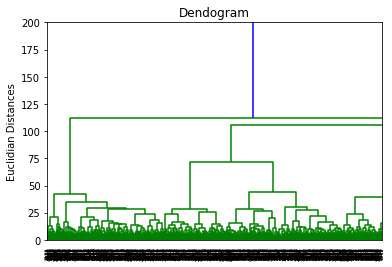

In [141]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(fit_for_cluster, 'ward')
dend = hierarchy.dendrogram(Z)
plt.title('Dendogram')
plt.ylabel('Euclidian Distances')
plt.xlim(0, 10000)
plt.ylim(0, 200)
plt.show()

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(fit_for_cluster)

In [37]:
#gives 2 centroids (center of cluster)
centroids = kmeans.cluster_centers_

In [66]:
def plot_dendrogram(clustering, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(clustering.children_.shape[0])
    n_samples = len(clustering.labels_)
    for i, merge in enumerate(clustering.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([clustering.children_, clustering.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [38]:
from sklearn.decomposition import PCA
X = fit_for_cluster
pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=2)
data_for_plot = pca.fit_transform(fit_for_cluster)

In [39]:
print(data_for_plot)

[[-0.98620955 -3.87008907]
 [-1.19069899 -0.88707346]
 [-0.32950801 -1.5637532 ]
 ...
 [ 3.92229763  0.88257715]
 [-3.31552827  0.9104279 ]
 [-2.3297582   1.83743414]]


In [40]:
X = data_for_plot
import matplotlib.pyplot as plt
labels = range(1, 11)
plt.figure(figsize=(10, 7))
#plt.subplots_adjust(bottom=0.1)

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [138]:
X.T[1]

array([-3.69673132, -0.77072186, -0.84902947, ...,  0.22105994,
        2.16449642,  2.72938514])

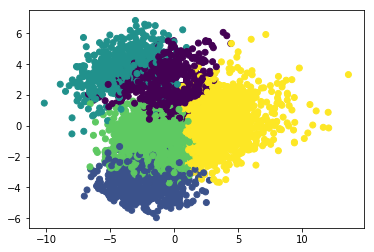

In [139]:
plt.scatter(X.T[0],X.T[1],c=kmeans.predict(fit_for_cluster))
plt.show()

In [44]:
from gensim.models import Word2Vec
from scipy.spatial.distance import cdist
import scipy

In [45]:
threshold = .8

In [56]:
def is_true_of_false(claim):
    #claim is a string
    vocab_words = [word for word in claim.split() if word in model1.wv]
    word_vectors = [model1.wv[word] for word in vocab_words]
    #claim_vector = np.to_array(word_vectors).max(axis=0)
    claim_vector = [row.max(axis=0) for row in np.asarray(word_vectors)]
    distances = [scipy.stats.wasserstein_distance(claim_vector, centroid) for centroid in centroids]
    #distances = [cdist(claim_vector, centroid) for centroid in centroids]
    if min(distances) > threshold:
        return "Not true", min(distances)-threshold
    return "True", min(distances)-threshold

In [51]:
print(lower_case_word)

time-consuming.


In [53]:
claims_list2[:5]

['Introduction  The rapid worldwide spread of the new epidemic COVID-19, caused by the virus SARS-CoV-2, with now more than 3.4 million confirmed cases of the disease and a confirmed death rate of almost 7% (World Health Organization, 2020) requires fast and comprehensive efforts of states and societies to combat the disease effectively by means of practical and appropriate medical, administrative and economic actions.',
 'Currently, our knowledge about innate immune defense mechanisms against SARS-CoV-2 in the respiratory tract is very limited.To identify endogenous antiviral peptides and proteins, we previously generated peptide/protein libraries from body fluids and tissues and screened the resulting fractions for antiviral factors 3 .',
 'Currently, evidence suggests that viruses have evolved a diverse array of countermeasures to contend with this pathway; some inhibit autophagy and are negatively affected when this interference is abrogated, while others appear to subvert it to th

In [57]:
for sent in claims_list2[:5]:
    print((is_true_of_false(sent),sent))

(('True', -0.5879210588345827), 'Introduction  The rapid worldwide spread of the new epidemic COVID-19, caused by the virus SARS-CoV-2, with now more than 3.4 million confirmed cases of the disease and a confirmed death rate of almost 7% (World Health Organization, 2020) requires fast and comprehensive efforts of states and societies to combat the disease effectively by means of practical and appropriate medical, administrative and economic actions.')
(('True', -0.5951869996003922), 'Currently, our knowledge about innate immune defense mechanisms against SARS-CoV-2 in the respiratory tract is very limited.To identify endogenous antiviral peptides and proteins, we previously generated peptide/protein libraries from body fluids and tissues and screened the resulting fractions for antiviral factors 3 .')
(('True', -0.3758890575650894), 'Currently, evidence suggests that viruses have evolved a diverse array of countermeasures to contend with this pathway; some inhibit autophagy and are neg

ValueError: c of shape (100,) not acceptable as a color sequence for x with size 2, y with size 2

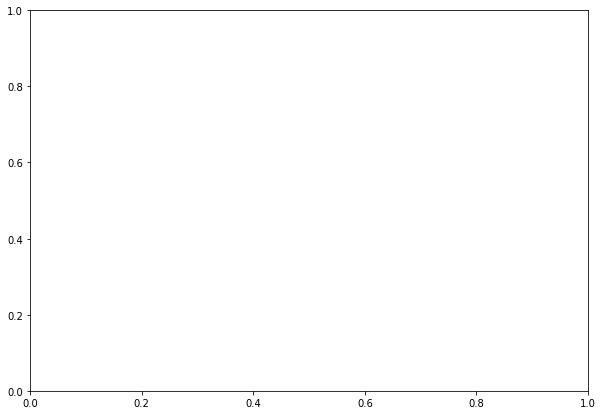

In [88]:
X = data_for_plot
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.scatter(X[0],X[1],label='True Position', c=kmeans.predict(fit_for_cluster).ravel())
for label, x, y in zip(labels, X[0], X[1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [79]:
print(kmeans.predict(fit_for_cluster))

[4 2 0 1 2 1 1 1 4 0 1 2 1 4 1 2 2 4 3 3 0 3 1 4 2 1 1 1 1 1 1 3 1 1 2 2 4
 0 4 1 0 2 1 0 1 0 1 3 4 4 1 4 1 1 1 2 2 1 1 3 2 1 3 2 3 2 4 0 2 0 2 2 1 4
 1 0 4 4 0 1 0 4 4 0 2 1 1 4 1 1 2 3 0 3 2 1 0 0 2 1]


In [ ]:
from sklearn.decomposition import PCA
X = fit_for_cluster
pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=2)

# Use Agglomerative Clustering to Cluster claims

### Basic Idea: start with a set of points, then merge the 2 closest, repeat until you have 1 group of points


In [22]:
from collections import Counter

### Term Frequency on all text (not just the ones with assertions)

In [24]:
# We must create the new column before trying to assessing any value
df['words'] = ""

# Counting frequencies
i = 0
for row in df['text']:
    df['words'][i] = str(Counter(row.split()).most_common())
    i+=1

In [29]:
word_freq = defaultdict(int)
for sent in df.tokenized_sents:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

2494587

In [30]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['.',
 '1) .',
 'Fig.',
 '2) .',
 'CC-BY-NC-ND 4.0 International license It is made available under a is the author/funder, who has granted medRxiv a license to display the preprint in perpetuity.',
 'As shown in Fig.',
 'No reuse allowed without permission.',
 '3) .',
 '4) .',
 '1 ).']

### Inverse Term Frequency in the works...

In [31]:
df['inv_freq'] = ""

#counting frequencies
i = 0
for row in df['text']:
    df['inv_freq'][i] = str(Counter(row.split()).most_common())
    #i+=1
    df['inv_freq'][i] = np.log(df['inv_freq'][i])
    i+=1

TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
def inv_doc_freq(word, docs):
    count = 0
    for doc in docs:
        if word in doc: count += 1
    return log(len(docs)/count)